In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
############

In [3]:
# import the data
# clean the data
# split the data into training/test sets
# create a model
# train the model
# make predictions
# evuluate and improve

In [4]:
# Yapay sinir aglari el yazisi tanima
# is problemi
# veriyi anlamak
# veriyi hazirlamak
# modelleme
# degerlendirme

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")


In [6]:
# Mnist veri seti yuklenmesi
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Egitim Seti Boyutu:",x_train.shape,y_train.shape)

Egitim Seti Boyutu: (60000, 28, 28) (60000,)


In [7]:
print("Test Seti Boyutu:",x_test.shape,y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [8]:
num_labels=len(np.unique(y_train))

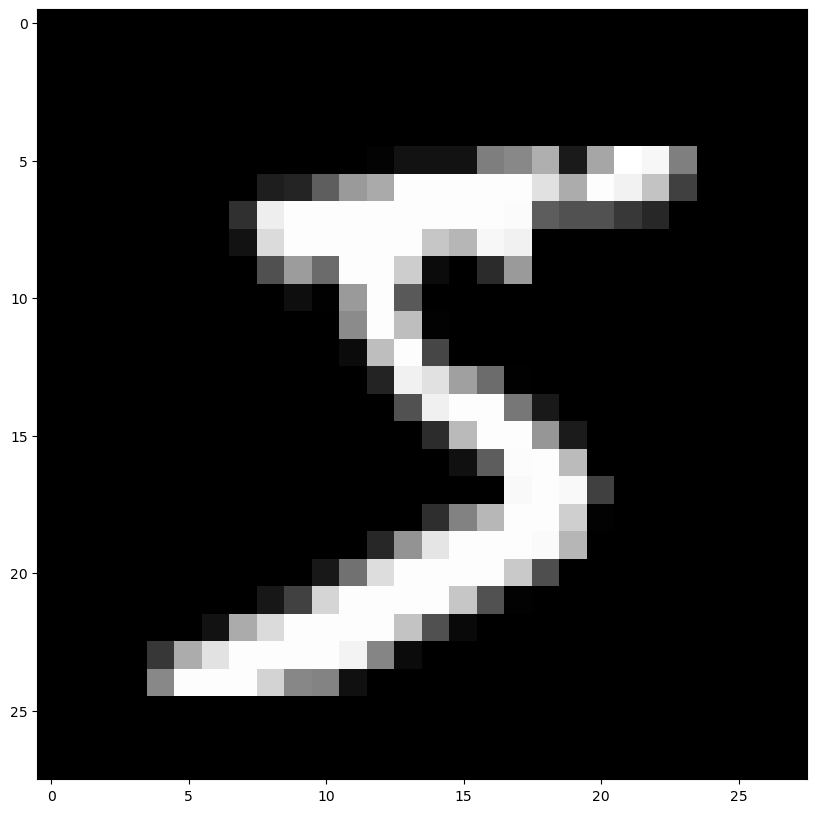

In [9]:
# veri setinden ornekler gosterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap='gray')

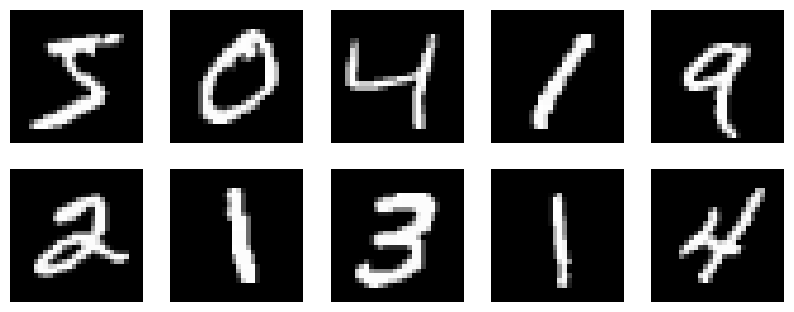

In [10]:
plt.figure(figsize=(10,10))
for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap='gray')
    plt.axis('off')

In [11]:
def visualize_img(data):
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax=plt.subplot(5,5,n+1)
        plt.imshow(data[n],cmap='gray')
        plt.axis('off')

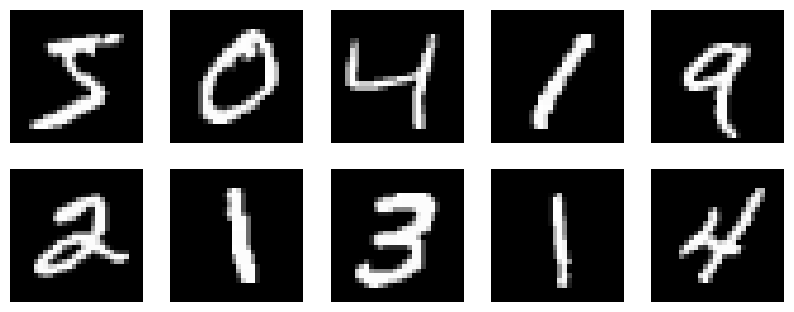

In [34]:
visualize_img(x_train)

In [13]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [14]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    
    treshold=img.max()/2.5

    for x in range(width):
        for y in range(height):

            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                        color='white' if img[x][y]<treshold else 'black')
    

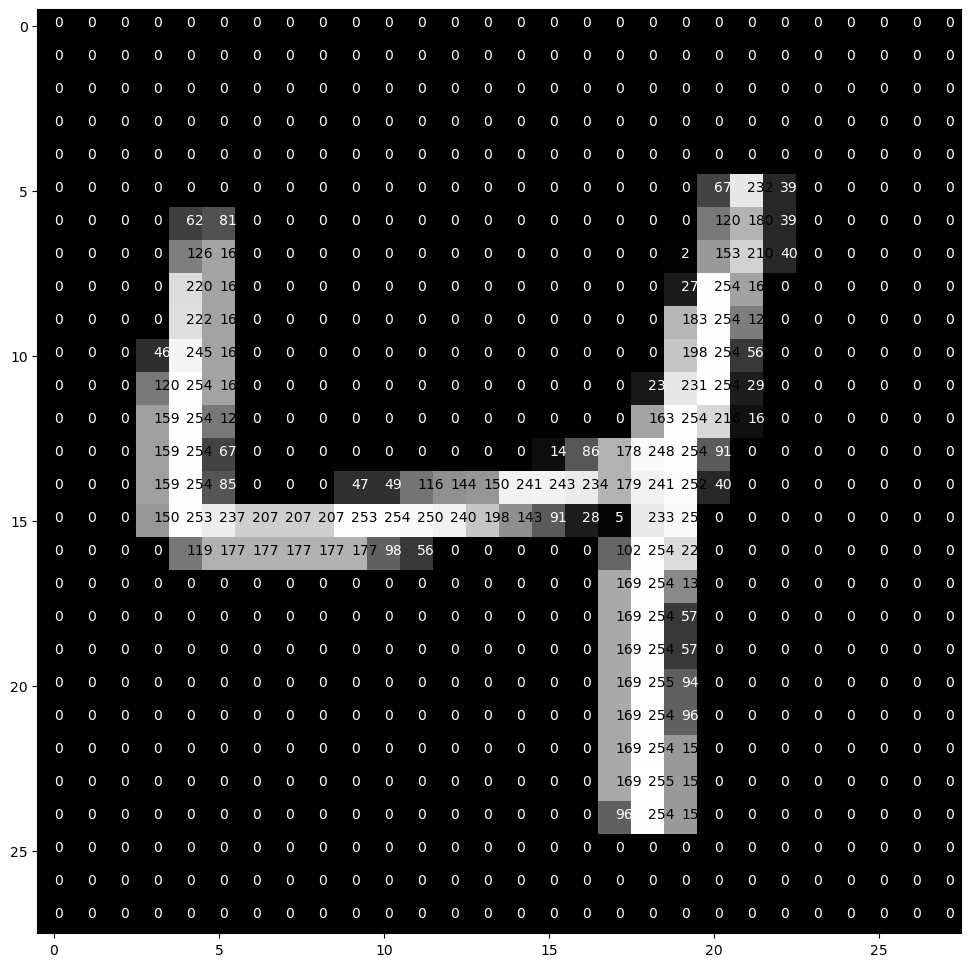

In [15]:
pixel_visualize(x_train[2])

In [16]:
# veriyi hazirlama
# encoding
# reshaping
# normalization

In [17]:
# encoding 
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [19]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
# reshaping
image_size=x_train.shape[1]

In [21]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [22]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [23]:
# modelleme(modeling)
# sinir agi mimarisini tanimlamak

In [27]:
import tensorflow as tf
model=tf.keras.Sequential([Flatten(input_shape=(28,28,1)),
                           Dense(units=128,activation='relu',name='layer1'),
                           Dense(units=num_labels,activation='softmax',name='outplayer_layer')])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

#Flatten:Bu katman, giriş verilerini tek boyutlu bir vektöre dönüştürür.veriyi düzler.
#input_shape=(28, 28, 1): Giriş görüntülerinin boyutlarını belirtir (28x28 piksel, 1 kanal - gri tonlamalı).
#relu:söndürmeye geçiş, bağlantıları
#softmax:sınıflandırma problemleri için uygundur ve çıktıları olasılıklar olarak yorumlanır.
#loss:modelin tahminleri ile gerçek değerler arasındaki farkı hesaplar. performans gösterdiğini ölçer
#cross_entropy:Modelin tahmin ettiği olasılık dağılımı ile gerçek sınıf dağılımı arasındaki farkı hesaplar.
#optimizer:kayıp fonksiyonunu minimize etmek için modelin ağırlıklarını günceller



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 outplayer_layer (Dense)     (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.3572 - precision: 0.9467 - recall: 0.8495 - accuracy: 0.9008 - val_loss: 0.1941 - val_precision: 0.9579 - val_recall: 0.9314 - val_accuracy: 0.9435
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1639 - precision: 0.9645 - recall: 0.9428 - accuracy: 0.9530 - val_loss: 0.1343 - val_precision: 0.9687 - val_recall: 0.9532 - val_accuracy: 0.9608
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1183 - precision: 0.9734 - recall: 0.9595 - accuracy: 0.9656 - val_loss: 0.1117 - val_precision: 0.9741 - val_recall: 0.9623 - val_accuracy: 0.9675
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0917 - precision: 0.9789 - recall: 0.9687 - accuracy: 0.9737 - val_loss: 0.0948 - val_precision: 0.9775 - val_recall: 0.9670 - val_accuracy: 0.9715
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - precision: 0.9827 - r

In [28]:
# model basarisi degerlendirme(evulation)

In [29]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.3604 - precision_2: 0.9468 - recall_2: 0.8473 - accuracy: 0.9004 - val_loss: 0.1889 - val_precision_2: 0.9593 - val_recall_2: 0.9331 - val_accuracy: 0.9465
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1632 - precision_2: 0.9645 - recall_2: 0.9439 - accuracy: 0.9535 - val_loss: 0.1323 - val_precision_2: 0.9702 - val_recall_2: 0.9557 - val_accuracy: 0.9614
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1168 - precision_2: 0.9734 - recall_2: 0.9596 - accuracy: 0.9661 - val_loss: 0.1082 - val_precision_2: 0.9748 - val_recall_2: 0.9631 - val_accuracy: 0.9685
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - precision_2: 0.9791 - recall_2: 0.9690 - accuracy: 0.9735 - val_loss: 0.0956 - val_precision_2: 0.9772 - val_recall_2: 0.9671 - val_accuracy: 0.9716
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

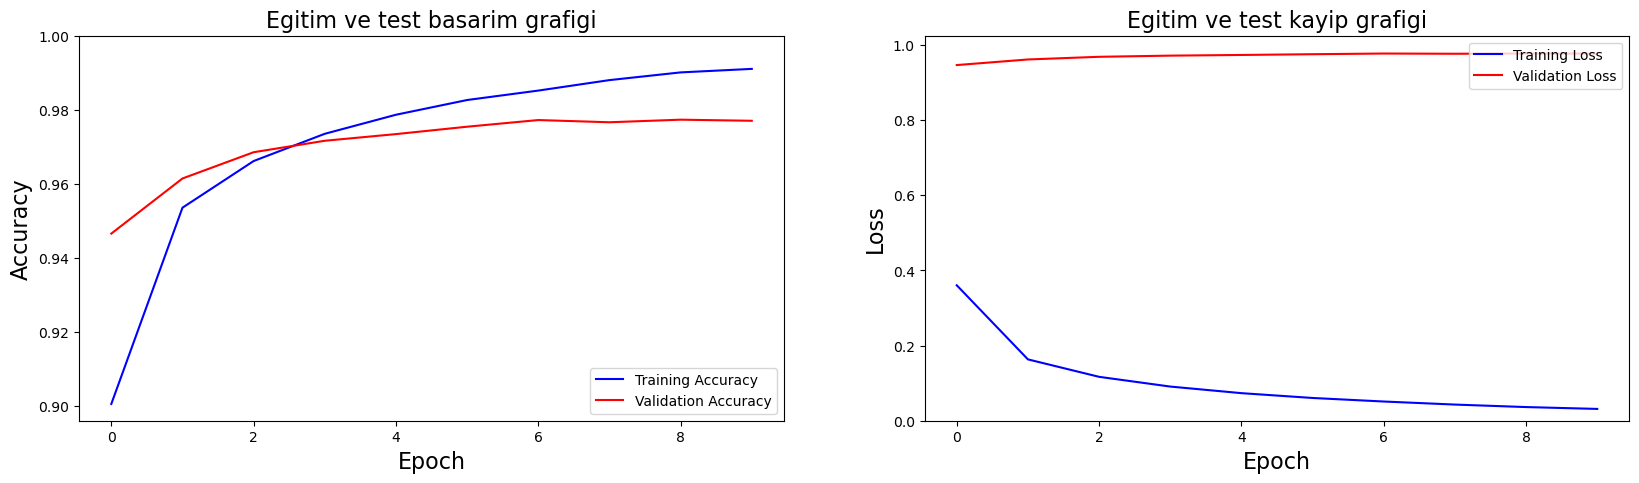

In [31]:
#accuracy ve loss grafikleri
#accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Egitim ve test basarim grafigi',fontsize=16)

#loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Egitim ve test kayip grafigi',fontsize=16)
plt.show()

In [32]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)